# ¿En que zona o departamento de la provincia de Mendoza Argentina me debería ubicar si deseo realizar optimamente enoturismo?

## Preguntas de interés

* ¿Donde ubicarse estrategicamente para visitar la mayor cantidad de bodegas?
* ¿La ciudad de Mendoza es el departamento con más cantidad de ubicaciones para hospedarse?
* ¿Es mucho más facil encontrar un Hotel que cualquier establecimiento?

## Hipótesis

* La zona donde podemos encontrar más cantidad de cabañas para hospedarnos en la provincia es la zona oeste (Lujan de cuyo, Tunuyán, Tupungato, San Carlos) debido a que es un área montañoza porque atravieza la cordillera de Los Andes. -
* Valle De Uco, conformado por (Tunuyán, Tupungato y San Carlos) es donde podemos encontrar más fincas con viñedos. Por lo tanto es donde se ubica mayor cantidad de bodegas.
* El centro de Mendoza es el departamento donde podemos encontrar más cantidad de hoteles ya que se ubica cercano a la terminal de omnibus y el aeropuerto Internacional Francisco Gabrielli.

##### Importo las librerías necesarias para el proyecto


In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import requests
import json

#### EDA (Análisis exploratorio de datos) sobre alojamientos turisticos de la provincia de mendoza

DATO: El dataset que elegí no tenía datos sobre Latitud y longitud, por lo tanto, generé mediante la extensión de GeoCode de Google Sheets estos datos faltantes por medio de la columna "DIRECCION_COMPLETA"

In [402]:
df_alojamientos_mendoza = pd.read_csv('https://raw.githubusercontent.com/TheOutlierMan/public-datasets/main/mendoza-datasets/alojamientos-mendoza.csv',sep=',', index_col=0, encoding='latin-1').reset_index()

df_alojamientos_mendoza

,RUBRO,NOMBRE FANTASIA,DIRECCION,NUMERO,LOCALIDAD,DEPARTAMENTO,TELEFONOS,CLASE,CATEGORIA,ESTADO,HABIT.,PLAZAS,TITULAR,E-MAIL,DIRECCION_COMPLETA,LATITUD,LONGITUD
0,HOTEL,"PARK HYATT MENDOZA, HOTEL, CASINO & SPA",CHILE,1124,CIUDAD,CAPITAL,4411234/5,HOTEL,5 ESTRELLAS,INSCRIPTO,186,367.0,NUEVO PLAZA HOTEL MENDOZA S.A.,phmendoza@hyattintl.com www.mendoza.park.hyatt...,"HOTEL PARK HYATT MENDOZA, HOTEL, CASINO & SPA ...",-32.889097,-68.845888
1,HOTEL,CERVANTES,AMIGORENA,NaN,CIUDAD,CAPITAL,5200446/5200400,HOTEL,3 ESTRELLAS,INSCRIPTO,60,150.0,CERVANTES S.A.C.I.A,reservas@hotelcervantes.com.ar,HOTEL CERVANTES CIUDAD CAPITAL MENDOZA,-32.892118,-68.838807
2,HOTEL,GRAND HOTEL BALBI,AV.LAS HERAS,340,CIUDAD,CAPITAL,4233500/3610/3442,HOTEL,3 ESTRELLAS,INSCRIPTO,108,250.0,"TUBERT, AARON S.A.",reservas@hotelbalbi.com.ar,HOTEL GRAND HOTEL BALBI CIUDAD CAPITAL MENDOZA,-32.885680,-68.842675
3,CABAÃÂ¥AS,LA HORQUETA,RUTA 173,KM10,CAÃÂ¥ON DEL ATUEL,SAN RAFAEL,156643802,CABAÃÂ¥AS,SIN CATEGORIZAR,INSCRIPTO,29,114.0,"TOLEDO, SANTIAGO BENJAMIN",horqueta@infovia.com.ar,CABAÃÂ¥AS LA HORQUETA CAÃÂ¥ON DEL ATUEL SAN ...,-34.612892,-68.339062
4,ALOJAMIENTO,CASITA SUIZA,LAS HERAS,S/N,USPALLATA,LAS HERAS,NaN,ALOJAMIENTO,SIN CATEGORIZAR,E/T,NaN,NaN,"MOLINA, RODRIGO",NaN,ALOJAMIENTO CASITA SUIZA USPALLATA LAS HERAS M...,-32.591157,-69.347035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,ALOJAMIENTO,TERRAZAS DE ENCALADA,RUTA PROV.82,KM.29,SIERRAS DE ENCALADA,LAS HERAS,4218066,ALOJAMIENTO,SIN CATEGORIZAR,E/T,NaN,NaN,"GONZALEZ, FABIAN CLAUDIO",NaN,ALOJAMIENTO TERRAZAS DE ENCALADA SIERRAS DE EN...,-33.047341,-69.060166
862,ALOJAMIENTO,COMPLEJO BARRAQUERO,NATALIO SEGURA,1803,CIUDAD,GODOY CRUZ,261-4548910,ALOJAMIENTO,SIN CATEGORIZAR,E/T,NaN,NaN,"ARMENDARIZ, FERNANDO LUIS",NaN,ALOJAMIENTO COMPLEJO BARRAQUERO CIUDAD GODOY C...,-32.947572,-68.843349
863,ALOJAMIENTO,NERUDA,GUTIERREZ,375,CIUDAD,CAPITAL,156826533,ALOJAMIENTO,SIN CATEGORIZAR,E/T,NaN,NaN,"SAINVENA, ISABEL NUNCIA",NaN,ALOJAMIENTO NERUDA CIUDAD CAPITAL MENDOZA,-34.586903,-68.143141
864,ALOJAMIENTO,TALU,BLAS PARERA,1540,CIUDAD,SAN RAFAEL,260-4619229,ALOJAMIENTO,SIN CATEGORIZAR,E/T,7,18.0,SIN RESERVA S.R.L.,j.marcheroni@yahoo.com.ar,ALOJAMIENTO TALU CIUDAD SAN RAFAEL MENDOZA,-34.625278,-68.355833


#### Data wrangling

In [403]:
df_alojamientos_mendoza.dtypes

RUBRO                  object
NOMBRE FANTASIA        object
DIRECCION              object
NUMERO                 object
LOCALIDAD              object
DEPARTAMENTO           object
TELEFONOS              object
CLASE                  object
CATEGORIA              object
ESTADO                 object
HABIT.                 object
PLAZAS                float64
TITULAR                object
E-MAIL                 object
DIRECCION_COMPLETA     object
LATITUD               float64
LONGITUD              float64
dtype: object

In [404]:
df_alojamientos_mendoza.isnull().sum()

RUBRO                   0
NOMBRE FANTASIA         0
DIRECCION               0
NUMERO                 60
LOCALIDAD               5
DEPARTAMENTO            0
TELEFONOS              76
CLASE                   0
CATEGORIA               1
ESTADO                  3
HABIT.                213
PLAZAS                223
TITULAR                 4
E-MAIL                320
DIRECCION_COMPLETA      0
LATITUD                 0
LONGITUD                0
dtype: int64

#### Limpieza de datos

In [405]:
# Unificar categorías similares
df_alojamientos_mendoza['RUBRO'] = df_alojamientos_mendoza['RUBRO'].str.upper()
df_alojamientos_mendoza['RUBRO'] = df_alojamientos_mendoza['RUBRO'].replace({'ALOJAMIENTO': 'ALOJAMIENTO', 'AOLJAMIENTO': 'ALOJAMIENTO', 'CABAÃÂ¥AS': 'CABAÑAS'})

df_alojamientos_mendoza['CLASE'] = df_alojamientos_mendoza['CLASE'].str.upper()
df_alojamientos_mendoza['CLASE'] = df_alojamientos_mendoza['CLASE'].replace({'ALOJAMIENTO': 'ALOJAMIENTO', 'AOLJAMIENTO': 'ALOJAMIENTO', 'CABAÃÂ¥AS': 'CABAÑAS'})

In [406]:
# Cambio el nombre de las columnas que no puedan entenderse
df_alojamientos_mendoza.rename(columns={'HABIT.': 'HABITACIONES', 'NOMBRE FANTASIA': 'NOMBRE_FANTASIA'}, inplace=True)

In [407]:
# Rellenar NaN en columnas de texto con una cadena vacía
df_alojamientos_mendoza['LOCALIDAD'].fillna('', inplace=True)
df_alojamientos_mendoza['TELEFONOS'].fillna('', inplace=True)
df_alojamientos_mendoza['CATEGORIA'].fillna('SIN CATEGORIZAR', inplace=True)
df_alojamientos_mendoza['ESTADO'].fillna('', inplace=True)
df_alojamientos_mendoza['TITULAR'].fillna('', inplace=True)
df_alojamientos_mendoza['E-MAIL'].fillna('', inplace=True)
df_alojamientos_mendoza['NUMERO'].fillna('S/N', inplace=True)

In [408]:
# Eliminar duplicados
df_alojamientos_mendoza.drop_duplicates(inplace=True)

In [409]:
df_alojamientos_mendoza.isnull().sum()

RUBRO                   0
NOMBRE_FANTASIA         0
DIRECCION               0
NUMERO                  0
LOCALIDAD               0
DEPARTAMENTO            0
TELEFONOS               0
CLASE                   0
CATEGORIA               0
ESTADO                  0
HABITACIONES          210
PLAZAS                220
TITULAR                 0
E-MAIL                  0
DIRECCION_COMPLETA      0
LATITUD                 0
LONGITUD                0
dtype: int64

Como podemos observar el dataset se limpió lo maximo que se podía, ya que no podemos obtener una media ni tampoco cambiar los valores nulos a 0 de la cantidad de Habitaciones, Plazas porque esto generaría información erronea.

#### Visualización de datos, validación de hipótesis y preguntas.

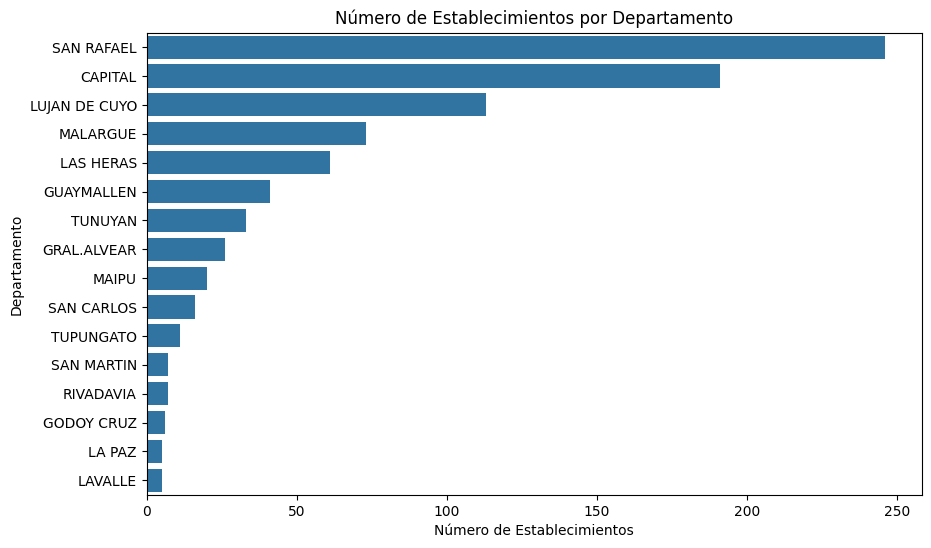

In [410]:
# Visualizo el número total de establecimientos por departamento

plt.figure(figsize=(10, 6))
sns.countplot(y='DEPARTAMENTO', data=df_alojamientos_mendoza, order=df_alojamientos_mendoza['DEPARTAMENTO'].value_counts().index)
plt.title('Número de Establecimientos por Departamento')
plt.xlabel('Número de Establecimientos')
plt.ylabel('Departamento')
plt.show()

**Con este gráfico podemos responder a la pregunta "¿La ciudad de Mendoza es el departamento con más cantidad de ubicaciones para hospedarse?. Podemos verificar que el departamento con más cantidad de establecimientos es "San Rafael".**

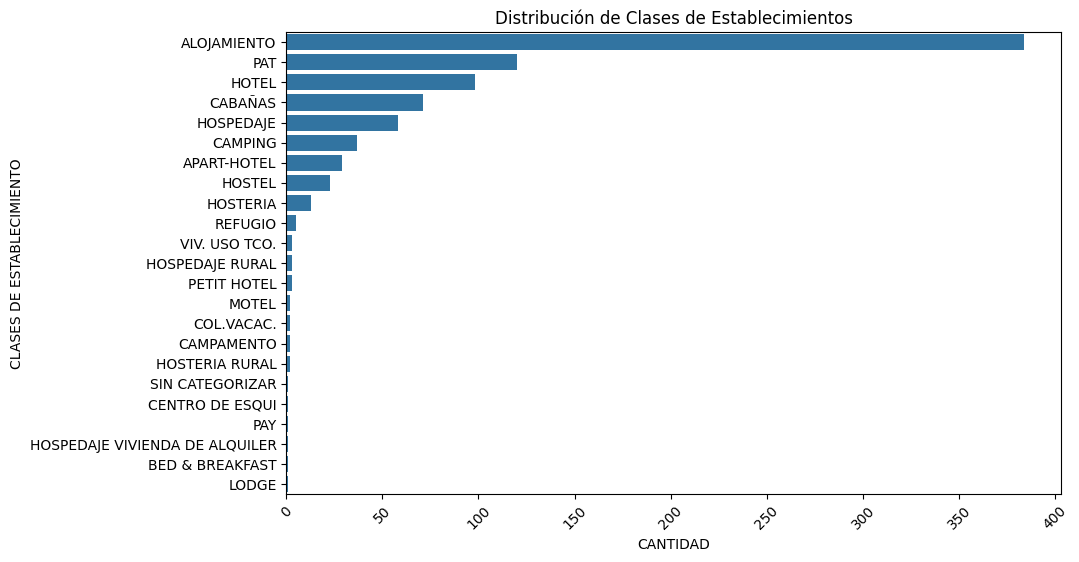

In [411]:
# Visualización de las clases de establecimientos

plt.figure(figsize=(10, 6))
sns.countplot(y='CLASE', data=df_alojamientos_mendoza, order=df_alojamientos_mendoza['CLASE'].value_counts().index)
plt.title('Distribución de Clases de Establecimientos')
plt.xlabel('CANTIDAD')
plt.ylabel('CLASES DE ESTABLECIMIENTO')
plt.xticks(rotation=45)
plt.show()

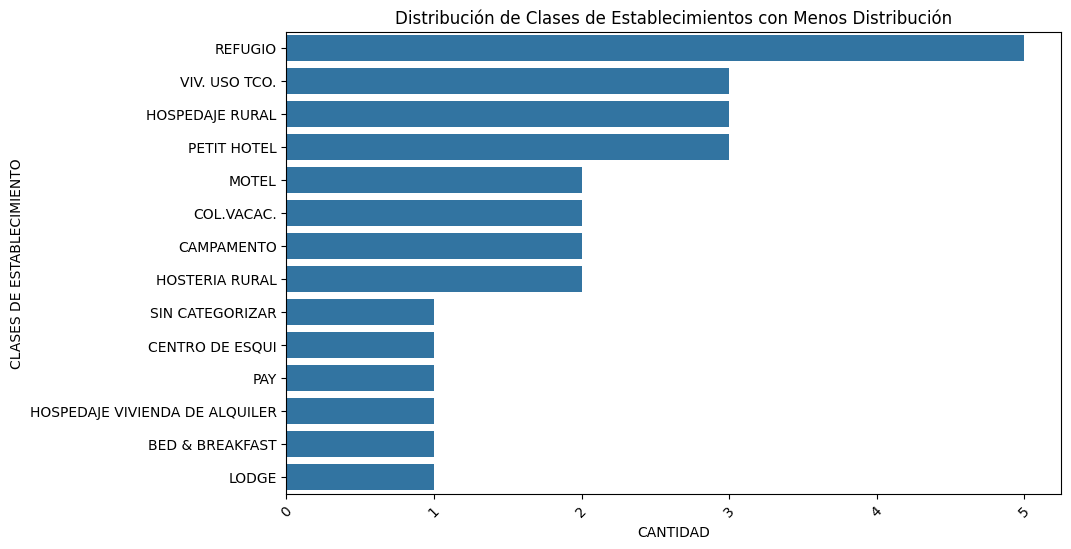

In [412]:
# Descartar las categorías específicas en RUBRO
categorias_a_descartar = ["ALOJAMIENTO", "PAT", "HOTEL", "CABAÑAS", "HOSPEDAJE", "CAMPING", "APART-HOTEL", "HOSTEL", "HOSTERIA"]
df_alojamientos_menos_distribucion = df_alojamientos_mendoza[~df_alojamientos_mendoza['CLASE'].isin(categorias_a_descartar)]

# Visualización de las clases de establecimientos con menos distribución
plt.figure(figsize=(10, 6))
sns.countplot(y='CLASE', data=df_alojamientos_menos_distribucion, order=df_alojamientos_menos_distribucion['CLASE'].value_counts().index)
plt.title('Distribución de Clases de Establecimientos con Menos Distribución')
plt.xlabel('CANTIDAD')
plt.ylabel('CLASES DE ESTABLECIMIENTO')
plt.xticks(rotation=45)
plt.show()

In [413]:
# Cantidad de alojamientos y hoteles
conteo_rubros = df_alojamientos_mendoza['RUBRO'].value_counts()

cantidad_alojamientos = conteo_rubros.get('ALOJAMIENTO', 0)
cantidad_hoteles = conteo_rubros.get('HOTEL', 0)

print(f"Cantidad de alojamientos: {cantidad_alojamientos}, cantidad de hoteles {cantidad_hoteles}")

Cantidad de alojamientos: 395, cantidad de hoteles 100


**Con estos gráficos podemos responder a la pregunta "¿Es mucho más facil encontrar un Hotel que cualquier establecimiento?", Como vemos esto es falso ya que la cantidad de alojamientos(395) es mucho mayor a la cantidad de hoteles(100)**

Ahora validaremos la siguiente hipótesis: *La zona donde podemos encontrar más cantidad de cabañas para hospedarnos en la provincia es la zona oeste (Lujan de cuyo, Tunuyán, Tupungato, San Carlos) debido a que es un área montañoza porque atravieza la cordillera de Los Andes.*

In [414]:
# Filtrar por rubro "CABAÑAS"
df_cabanas_mendoza = df_alojamientos_mendoza[df_alojamientos_mendoza['RUBRO'] == 'CABAÑAS']

zona_centro = ["CAPITAL", "GODOY CRUZ", "GUAYMALLEN"]
zona_sur = ["SAN RAFAEL", "GRAL.ALVEAR", "MALARGUE"]
zona_oeste = ["LUJAN DE CUYO", "TUNUYAN", "TUPUNGATO", "SAN CARLOS"]
zona_norte = ["LAS HERAS", "LAVALLE"]
zona_este = ["JUNIN", "RIVADAVIA", "SAN MARTIN", "SANTA ROSA", "LA PAZ"]

In [415]:
# Genero una nueva columna 'ZONA' en el DataFrame
df_cabanas_mendoza['ZONA'] = df_cabanas_mendoza['DEPARTAMENTO'].apply(
    lambda x: 'CENTRO' if x in zona_centro else
              ('SUR' if x in zona_sur else
               ('OESTE' if x in zona_oeste else
                ('NORTE' if x in zona_norte else
                 ('ESTE' if x in zona_este else ''))))
)

<ipython-input-415-d7fb85a3ff42>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [416]:
# Agrupar
cabanas_por_zona = df_cabanas_mendoza['ZONA'].value_counts().reset_index()
cabanas_por_zona.columns = ['ZONA', 'CANTIDAD']

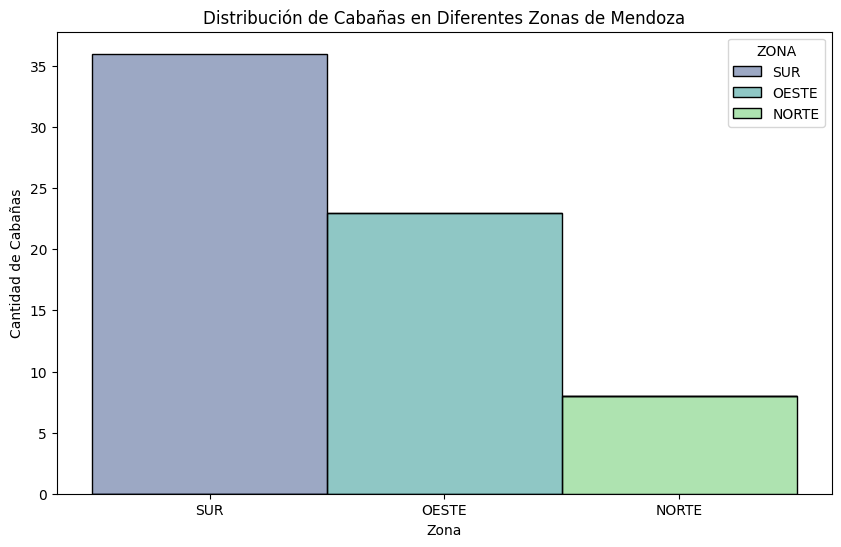

In [417]:
# Visualización de la distribución de Cabañas en Diferentes Zonas de Mendoza
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cabanas_mendoza, x='ZONA', hue='ZONA', multiple='stack', palette='viridis', kde=True)
plt.title('Distribución de Cabañas en Diferentes Zonas de Mendoza')
plt.xlabel('Zona')
plt.ylabel('Cantidad de Cabañas')
plt.show()

**Como observamos podemos descartar la hipótesis ya que la zona donde podemos encontrar mayor cantidad de cabañas para poder hospedarnos es la zona sur de la provincia.**

Ahora validaremos la siguiente hipótesis: *El centro de Mendoza es el departamento donde podemos encontrar más cantidad de hoteles ya que se ubica cercano a la terminal de omnibus y el aeropuerto Internacional Francisco Gabrielli.*

<ipython-input-418-11722ac85716>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




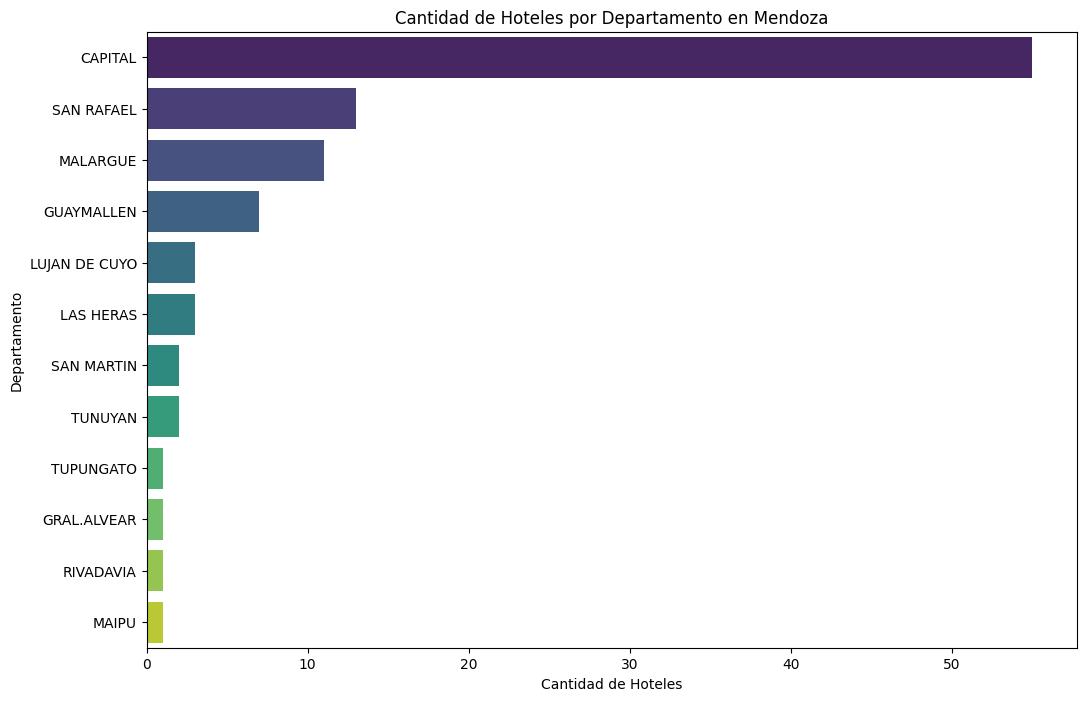

In [418]:
# Filtrar por rubro "HOTEL"
df_hoteles_mendoza = df_alojamientos_mendoza[df_alojamientos_mendoza['RUBRO'] == 'HOTEL']

# Contar el número de hoteles por departamento
hoteles_por_departamento = df_hoteles_mendoza['DEPARTAMENTO'].value_counts().reset_index()
hoteles_por_departamento.columns = ['DEPARTAMENTO', 'CANTIDAD']

# Generar una visualización
plt.figure(figsize=(12, 8))
sns.barplot(data=hoteles_por_departamento, x='CANTIDAD', y='DEPARTAMENTO', palette='viridis')
plt.title('Cantidad de Hoteles por Departamento en Mendoza')
plt.xlabel('Cantidad de Hoteles')
plt.ylabel('Departamento')
plt.show()

**Como observamos el la anterior visualización podemos Validar la hipótesis ya que la capital de Mendoza es donde podemos encontrar mayor cantidad de hoteles**

Para validar la siguiente hipótesis: *Valle De Uco, conformado por (Tunuyán, Tupungato y San Carlos) es donde podemos encontrar más fincas con viñedos. Por lo tanto es donde se ubica mayor cantidad de bodegas.*. Vamos a necesitar importar un nuevo dataset, el cual nos aporte datos sobre la ubicación de las bodegas en Mendoza

#### EDA aplicado a dataset de enoturismo de la provincia de mendoza

DATO: El dataset que elegí no tenía datos sobre Latitud y longitud, por lo tanto, generé mediante la extensión de GeoCode de Google Sheets estos datos faltantes por medio de la columna "DIRECCION_COMPLETA"

In [419]:
df_enoturismo_mendoza = pd.read_csv('https://raw.githubusercontent.com/TheOutlierMan/public-datasets/main/mendoza-datasets/enoturismo_mendoza.csv',sep=',', index_col=0, encoding='latin-1').reset_index()

df_enoturismo_mendoza

,nombre_bodega,direccion_bodega,direccion_numero_bodega,localidad_direccion_bodega,departamento_direccion_bodega,telefono_bodega,titular_bodega,correo_contacto_bodega,direccion_completa,Latitude,Longitude
0,VISTANDES BODEGAS &VIÂ¥EDOS,RUTA 60 Y URQUIZA,NaN,CRUZ DE PIEDRA,MAIPU,5246214,VISTANDES S.A.,info@vistande.com,VISTANDES BODEGAS &VIÂ¥EDOS MAIPU MENDOZA,-33.024758,-68.758524
1,BODEGA NAVARRO CORREAS,CARRIL RODRIGUEZ PEÂ¥A,1550,NaN,GODOY CRUZ,4315988,DIAGEO ARGENTINA S.A.,NaN,BODEGA NAVARRO CORREAS GODOY CRUZ MENDOZA,-32.923834,-68.817940
2,BODEGA DON BOSCO,RUTA PROVINCIAL 50,6722,RODEO DEL MEDIO,MAIPU,4951120,INSTITUCION SALESIANA SAN FRANCISCO SOLANO,NaN,BODEGA DON BOSCO MAIPU MENDOZA,-32.992788,-68.681602
3,BENVENUTO DE LA SERNA,ESPAÂ¥A,850,CAPITAL,CAPITAL,4200782,CALLE DI BOASI S.A.,NaN,BENVENUTO DE LA SERNA CAPITAL MENDOZA,-32.892843,-68.842784
4,BODEGAS LOPEZ,OZAMIS,375,GRAL.GUITIERREZ,MAIPU,4972406,BODEGASY VIÂ¥EDOS LOPEZ SAIC,lopezmza@bodegaslopez.com.ar,BODEGAS LOPEZ MAIPU MENDOZA,-32.962618,-68.784194
...,...,...,...,...,...,...,...,...,...,...,...
108,BODEGA VICENTE SOTTANO,COSTA FLORES Y RUTA NACIONAL 7,NaN,PERDRIEL,LUJAN DE CUYO,261-5621036,SOTANO S.A.,turismo@bodegasottano.com,BODEGA VICENTE SOTTANO LUJAN DE CUYO MENDOZA,-33.095093,-68.924431
109,BODEGA LA CELIA,CIRCUNVALACION,S/N,EUGENIO BUSTOS,SAN CARLOS,261-3057826,BODEGA LA CELIA S.A.,NaN,BODEGA LA CELIA SAN CARLOS MENDOZA,-33.779754,-69.070725
110,BODEGA,REINA,S/N,COLONIA LAS RODSAS,TUNUYAN,155346549,"GOMEZ, LAUREANO",NaN,BODEGA TUNUYAN MENDOZA,-33.581319,-69.015336
111,ENOTURISMO MARCELO RODRIGUEZ,RUTA 60 Y URQUIZA,NaN,COQUIMBITO,MAIPU,261-6299199,"RODRIGUEZ, MARCELO",rodriguezmarcelo96@yahoo.com.ar,ENOTURISMO MARCELO RODRIGUEZ MAIPU MENDOZA,-32.958493,-68.789548


#### Data Wrangling dataset enoturismo mendoza

In [420]:
df_enoturismo_mendoza.dtypes

nombre_bodega                     object
direccion_bodega                  object
direccion_numero_bodega           object
localidad_direccion_bodega        object
departamento_direccion_bodega     object
telefono_bodega                   object
titular_bodega                    object
correo_contacto_bodega            object
direccion_completa                object
Latitude                         float64
Longitude                        float64
dtype: object

In [421]:
df_enoturismo_mendoza.isnull().sum()

nombre_bodega                     0
direccion_bodega                  1
direccion_numero_bodega          13
localidad_direccion_bodega        3
departamento_direccion_bodega     0
telefono_bodega                  12
titular_bodega                    0
correo_contacto_bodega           33
direccion_completa                0
Latitude                          0
Longitude                         0
dtype: int64

#### Limpieza de datos dataset enoturismo mendoza

Para mantener la congruencia de lo que venímos trabajando vamos a cambiar el nombre de las columnas a español y mayusculas.

In [422]:
# Cambio el nombre de las columnas para mantener congruencia.
df_enoturismo_mendoza.rename(columns={'Latitude': 'LATITUD',
                                        'Longitude': 'LONGITUD',
                                        'nombre_bodega':'NOMBRE_BODEGA',
                                        'direccion_bodega':'DIRECCION_BODEGA',
                                        'direccion_numero_bodega':'NUMERO_BODEGA',
                                        'localidad_direccion_bodega':'LOCALIDAD_BODEGA',
                                        'departamento_direccion_bodega':'DEPARTAMENTO_BODEGA',
                                        'telefono_bodega':'TELEFONO_BODEGA',
                                        'titular_bodega':'TITULAR_BODEGA',
                                        'correo_contacto_bodega':'CORREO_BODEGA',
                                        'direccion_completa':'DIRECCION_COMPLETA'}, inplace=True)

In [423]:
# Rellenar NaN en columnas de texto con una cadena vacía
df_enoturismo_mendoza['DIRECCION_BODEGA'].fillna('', inplace=True)
df_enoturismo_mendoza['LOCALIDAD_BODEGA'].fillna('', inplace=True)
df_enoturismo_mendoza['CORREO_BODEGA'].fillna('', inplace=True)
df_enoturismo_mendoza['NUMERO_BODEGA'].fillna('S/N', inplace=True)

In [424]:
# Rellenar NaN en columnas numéricas con 0
df_enoturismo_mendoza['TELEFONO_BODEGA'].fillna(0, inplace=True)

In [425]:
# Eliminar duplicados
df_enoturismo_mendoza.drop_duplicates(inplace=True)

In [426]:
df_enoturismo_mendoza

,NOMBRE_BODEGA,DIRECCION_BODEGA,NUMERO_BODEGA,LOCALIDAD_BODEGA,DEPARTAMENTO_BODEGA,TELEFONO_BODEGA,TITULAR_BODEGA,CORREO_BODEGA,DIRECCION_COMPLETA,LATITUD,LONGITUD
0,VISTANDES BODEGAS &VIÂ¥EDOS,RUTA 60 Y URQUIZA,S/N,CRUZ DE PIEDRA,MAIPU,5246214,VISTANDES S.A.,info@vistande.com,VISTANDES BODEGAS &VIÂ¥EDOS MAIPU MENDOZA,-33.024758,-68.758524
1,BODEGA NAVARRO CORREAS,CARRIL RODRIGUEZ PEÂ¥A,1550,,GODOY CRUZ,4315988,DIAGEO ARGENTINA S.A.,,BODEGA NAVARRO CORREAS GODOY CRUZ MENDOZA,-32.923834,-68.817940
2,BODEGA DON BOSCO,RUTA PROVINCIAL 50,6722,RODEO DEL MEDIO,MAIPU,4951120,INSTITUCION SALESIANA SAN FRANCISCO SOLANO,,BODEGA DON BOSCO MAIPU MENDOZA,-32.992788,-68.681602
3,BENVENUTO DE LA SERNA,ESPAÂ¥A,850,CAPITAL,CAPITAL,4200782,CALLE DI BOASI S.A.,,BENVENUTO DE LA SERNA CAPITAL MENDOZA,-32.892843,-68.842784
4,BODEGAS LOPEZ,OZAMIS,375,GRAL.GUITIERREZ,MAIPU,4972406,BODEGASY VIÂ¥EDOS LOPEZ SAIC,lopezmza@bodegaslopez.com.ar,BODEGAS LOPEZ MAIPU MENDOZA,-32.962618,-68.784194
...,...,...,...,...,...,...,...,...,...,...,...
108,BODEGA VICENTE SOTTANO,COSTA FLORES Y RUTA NACIONAL 7,S/N,PERDRIEL,LUJAN DE CUYO,261-5621036,SOTANO S.A.,turismo@bodegasottano.com,BODEGA VICENTE SOTTANO LUJAN DE CUYO MENDOZA,-33.095093,-68.924431
109,BODEGA LA CELIA,CIRCUNVALACION,S/N,EUGENIO BUSTOS,SAN CARLOS,261-3057826,BODEGA LA CELIA S.A.,,BODEGA LA CELIA SAN CARLOS MENDOZA,-33.779754,-69.070725
110,BODEGA,REINA,S/N,COLONIA LAS RODSAS,TUNUYAN,155346549,"GOMEZ, LAUREANO",,BODEGA TUNUYAN MENDOZA,-33.581319,-69.015336
111,ENOTURISMO MARCELO RODRIGUEZ,RUTA 60 Y URQUIZA,S/N,COQUIMBITO,MAIPU,261-6299199,"RODRIGUEZ, MARCELO",rodriguezmarcelo96@yahoo.com.ar,ENOTURISMO MARCELO RODRIGUEZ MAIPU MENDOZA,-32.958493,-68.789548


In [427]:
df_enoturismo_mendoza.isnull().sum()

NOMBRE_BODEGA          0
DIRECCION_BODEGA       0
NUMERO_BODEGA          0
LOCALIDAD_BODEGA       0
DEPARTAMENTO_BODEGA    0
TELEFONO_BODEGA        0
TITULAR_BODEGA         0
CORREO_BODEGA          0
DIRECCION_COMPLETA     0
LATITUD                0
LONGITUD               0
dtype: int64

Como podemos observar el dataset quedó libre de valores nulos y totalmente congruente con los valores trabajados anteriormente

#### Visualización de datos, validación de hipótesis y preguntas del dataset de enoturismo Mendoza.

Ahora si podemos validar la hipótesis : *Valle De Uco, conformado por (Tunuyán, Tupungato y San Carlos) es donde podemos encontrar más fincas con viñedos. Por lo tanto es donde se ubica mayor cantidad de bodegas.*

In [428]:
# Filtrar por departamentos del Valle de Uco
valle_de_uco = ['TUNUYAN', 'TUPUNGATO', 'SAN CARLOS']
df_valle_de_uco = df_enoturismo_mendoza[df_enoturismo_mendoza['DEPARTAMENTO_BODEGA'].isin(valle_de_uco)]

In [429]:
# Contar el número de bodegas por departamento
bodegas_por_departamento = df_enoturismo_mendoza['DEPARTAMENTO_BODEGA'].value_counts().reset_index()
bodegas_por_departamento.columns = ['DEPARTAMENTO', 'CANTIDAD']

<ipython-input-430-af1310a2ed81>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




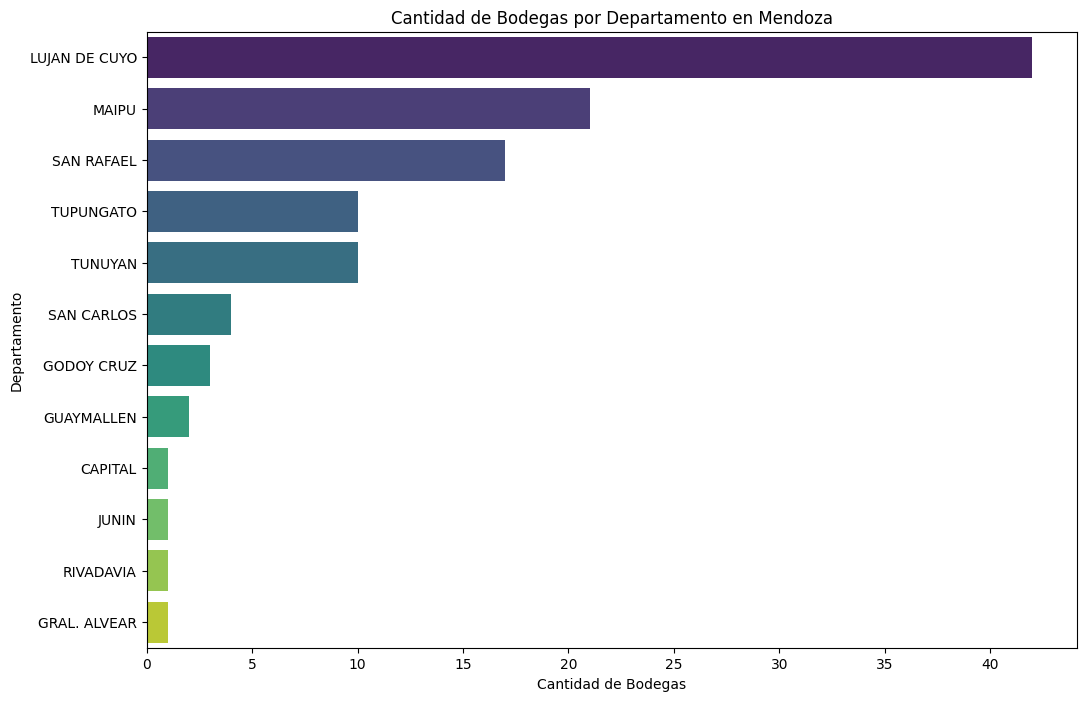

In [430]:
# Visualización de las bodegas por departamento
plt.figure(figsize=(12, 8))
sns.barplot(data=bodegas_por_departamento, x='CANTIDAD', y='DEPARTAMENTO', palette='viridis')
plt.title('Cantidad de Bodegas por Departamento en Mendoza')
plt.xlabel('Cantidad de Bodegas')
plt.ylabel('Departamento')
plt.show()

In [431]:
# Contar el número de bodegas en el Valle de Uco
bodegas_valle_de_uco = df_valle_de_uco['DEPARTAMENTO_BODEGA'].value_counts().sum()
print(f"Total de bodegas en el Valle de Uco: {bodegas_valle_de_uco}")

Total de bodegas en el Valle de Uco: 24


Como observamos en el gráfico anterior podemos descartar la hipótesis pero podemos responder a la pregunta *"¿Donde ubicarse estrategicamente para visitar la mayor cantidad de bodegas?"*, en este caso sería "Luján De Cuyo", debido a que cuenta con más de 40 bodegas, inclusive más que todo el Valle de Uco.

### Mostrar los datos en un mapa de coropletas

Importo el archivo geojson de la provincia de Mendoza y generar un mapa de coropletas para posteriormente marcar los puntos de los establecimientos y las bodegas.

In [432]:
# URL del archivo JSON
url = 'https://raw.githubusercontent.com/TheOutlierMan/cartografia/main/departamentos-mendoza.json'

# Hacer la solicitud GET
response = requests.get(url)

geojson_mendoza = response.json()

In [433]:
geojson_mendoza

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'id': 221,
    'departamento': 'GUAYMALLEN',
    'cabecera': 'VILLA NUEVA',
    'provincia': 'MENDOZA'},
   'geometry': {'coordinates': [[[-68.68791961699998, -32.82925796500001],
      [-68.67630004900002, -32.832035065000014],
      [-68.66172790500002, -32.83287429799998],
      [-68.64820098899997, -32.83195877100002],
      [-68.636756897, -32.831928253],
      [-68.65025329600002, -32.839878081999984],
      [-68.65019226099997, -32.856586456],
      [-68.64871215800002, -32.87259292599998],
      [-68.65118408199999, -32.877872466999975],
      [-68.661132812, -32.88951110800002],
      [-68.66112518300002, -32.89267349199997],
      [-68.66361999499998, -32.894264221000014],
      [-68.66295623799999, -32.90428924600002],
      [-68.666671753, -32.911682128999985],
      [-68.66041564900002, -32.91377639799998],
      [-68.66912078899998, -32.92540740999999],
      [-68.67224121100003, -32.9275283

In [434]:
# Extraigo las propiedades del geojson y las convierto en un dataframe de pandas.

data = {
    'id': [],
    'departamento': [],
    'cabecera': [],
    'provincia': []
}

for feature in geojson_mendoza['features']:
    properties = feature['properties']
    data['id'].append(properties['id'])
    data['departamento'].append(properties['departamento'])
    data['cabecera'].append(properties['cabecera'])
    data['provincia'].append(properties['provincia'])

df_departamentos = pd.DataFrame(data)

In [435]:
df_departamentos

,id,departamento,cabecera,provincia
0,221,GUAYMALLEN,VILLA NUEVA,MENDOZA
1,222,SANTA ROSA,SANTA ROSA,MENDOZA
2,223,MAIPU,MAIPU,MENDOZA
3,224,CAPITAL,MENDOZA,MENDOZA
4,225,GODOY CRUZ,GODOY CRUZ,MENDOZA
5,226,JUNIN,JUNIN,MENDOZA
6,227,RIVADAVIA,RIVADAVIA,MENDOZA
7,228,GENERAL ALVEAR,GENERAL ALVEAR,MENDOZA
8,220,SAN MARTIN,SAN MARTIN,MENDOZA
9,229,LA PAZ,LA PAZ,MENDOZA


In [436]:
# Convertir la columna 'departamento' a tipo numérico (float) y manejar los valores no válidos
df_departamentos['departamento'] = pd.to_numeric(df_departamentos['departamento'], errors='coerce')

# Eliminar filas con valores no válidos en la columna 'departamento'
df_departamentos_clean = df_departamentos.dropna(subset=['departamento'])

In [437]:
# Crear un objeto de mapa centrado en Mendoza, Argentina
mendoza_map = folium.Map(location=[-32.8894587, -68.8458386], zoom_start=8)

In [438]:
# Agregar marcadores de los alojamientos (rojos)
for index, row in df_alojamientos_mendoza.iterrows():
    folium.Marker(location=[row['LATITUD'], row['LONGITUD']], popup=row['NOMBRE_FANTASIA'], icon=folium.Icon(color='red')).add_to(mendoza_map)

# Agregar marcadores de enoturismo (azules)
for index, row in df_enoturismo_mendoza.iterrows():
    folium.Marker(location=[row['LATITUD'], row['LONGITUD']], popup=row['NOMBRE_BODEGA'], icon=folium.Icon(color='blue')).add_to(mendoza_map)

In [440]:
# Agregar datos coropléticos al mapa (amarillo)
folium.Choropleth(
    geo_data=geojson_mendoza,
    name='choropleth',
    data=df_departamentos,
    columns=['id', 'departamento'],
    key_on='feature.properties.id',
    fill_color='YlOrBr',  # Cambiar el esquema de color a 'YlOrBr'
    fill_opacity=0.5,  # Ajustar la opacidad del relleno
    line_opacity=1.0,  # Ajustar la opacidad de las líneas de borde
    legend_name='Valor Coroplético'
).add_to(mendoza_map)


In [441]:
# Mostrar el mapa
mendoza_map

### Conclusiones finales e Insights.

#### Insights Preguntas

* ¿Donde ubicarse estrategicamente para visitar la mayor cantidad de bodegas?
    * Conviene ubicarnos en Luján De Cuyo, debido a que cuenta con más de 40 bodegas, inclusive más que todo el Valle de Uco.
* ¿La ciudad de Mendoza es el departamento con más cantidad de ubicaciones para hospedarse?
    * En el proyecto pudimos verificar gracias a los gráficos que el departamento con más cantidad de establecimientos para hospedarse es "San Rafael".
* ¿Es mucho más facil encontrar un Hotel que cualquier establecimiento?
    * Como vimos esto es falso ya que la cantidad de alojamientos(395) de la provincia de Mendoza es **395** y la de Hoteles **100**

#### Insights Hipótesis

* La zona donde podemos encontrar más cantidad de cabañas para hospedarnos en la provincia es la zona oeste (Lujan de cuyo, Tunuyán, Tupungato, San Carlos) debido a que es un área montañoza porque atravieza la cordillera de Los Andes.
    * Como pudimos observar en el gráfico y en el mapa podemos descartar la hipótesis, ya que la zona donde podemos encontrar mayor cantidad de cabañas para poder hospedarnos es la zona sur de la provincia.
* Valle De Uco, conformado por (Tunuyán, Tupungato y San Carlos) es donde podemos encontrar más fincas con viñedos. Por lo tanto es donde se ubica mayor cantidad de bodegas.
    * Descartamos esta hipótesis debido a que el conjuto de departamentos que conforman el Valle De Uco suman 24 Bodegas, lo cual no alcanza para superar el departamento de Lujan De Cuyo el cual supera los 40 establecimientos.
* El centro de Mendoza es el departamento donde podemos encontrar más cantidad de hoteles ya que se ubica cercano a la terminal de omnibus y el aeropuerto Internacional Francisco Gabrielli.
    * Gracias a la gráficas vistas y el mapa podemos validar la hipótesis, en el centro de Mendoza podemos visualizar mayor cantidad de Hoteles que el resto de la provincia



#### Recomendaciones

> Si deseas visitar el centro de mendoza y disfrutar lo que el centro te puede ofrecer, como teatros, plazas, parques, cultura, etc. Puedes encontrar y hospedarte mucho más facilmente hoteles que el resto de los departamentos.


> Si estás buscando cabañas y al mismo tiempo visitar bodegas puedes optar por viajar al departamento de **San Rafael**, ya que se ubica en la zona sur de la provincia que es donde hay mucha más cantidad de cabañas y es el tercer departamento con mayor cantidad de bodegas

> Si estás organizando realizar enoturismo en la provincia lo más optimo sería ubicarte en el departamento de **Lujan De Cuyo** ya que cuenta con más de 40 Bodegas y es el tercer departamento con mayor numero de establecimientos en los que te podrás hospedar.


### Información y datos técnicos.

Los datos fueron extraidos de la página oficial "Datos Abiertos Mendoza", para posteriormente procesarlos y generar mediante la extensión **Geocode** los datos de Latitud y longitud de enoturismo y alojamientos.

* https://datosabiertos.mendoza.gov.ar/

#### Datasets y Geojson.

* Dataset de alojamientos en Mendoza: https://raw.githubusercontent.com/TheOutlierMan/public-datasets/main/mendoza-datasets/alojamientos-mendoza.csv

* Dataset de enoturismo en Mendoza: https://raw.githubusercontent.com/TheOutlierMan/public-datasets/main/mendoza-datasets/enoturismo_mendoza.csv

* GeoJson de los departamentos de Mendoza: https://raw.githubusercontent.com/TheOutlierMan/cartografia/main/departamentos-mendoza.json

#### Presentación del proyecto

*